<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

Зробіть сегментацію для наступного зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/cat.jpg

* завантежте модель `deeplabv3_resnet50` та відповідні ваги `DeepLabV3_ResNet50_Weights` [документація](https://pytorch.org/vision/stable/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html#deeplabv3-resnet50)
* застосуйте `transforms.Resize` до зображення
* застосуйте `transforms` з ваг до зображення
* змініть розмірність зображення на потрібну
* отримайте результат моделі
* застосуйте `draw_segmentation_masks`

In [38]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights, deeplabv3_resnet50
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [43]:
img = read_image("/content/sample_data/cat (1).jpg")

img = transforms.Resize((320, 480))(img)


In [42]:
img

tensor([[[ 91,  91,  90,  ..., 178, 178, 178],
         [ 91,  90,  88,  ..., 178, 178, 178],
         [ 91,  89,  87,  ..., 178, 178, 178],
         ...,
         [189, 189, 189,  ..., 175, 175, 174],
         [187, 188, 188,  ..., 175, 175, 175],
         [187, 187, 187,  ..., 174, 175, 175]],

        [[ 86,  86,  85,  ..., 182, 182, 182],
         [ 86,  85,  83,  ..., 182, 182, 182],
         [ 86,  84,  82,  ..., 182, 182, 182],
         ...,
         [171, 171, 171,  ..., 158, 158, 157],
         [169, 170, 170,  ..., 158, 158, 158],
         [169, 169, 169,  ..., 157, 158, 158]],

        [[ 66,  66,  65,  ..., 168, 168, 168],
         [ 66,  65,  63,  ..., 168, 168, 168],
         [ 66,  64,  62,  ..., 168, 168, 168],
         ...,
         [149, 149, 149,  ..., 132, 132, 131],
         [147, 148, 148,  ..., 132, 132, 132],
         [147, 147, 147,  ..., 131, 132, 132]]], dtype=torch.uint8)

In [34]:
img.shape

torch.Size([3, 2700, 4000])

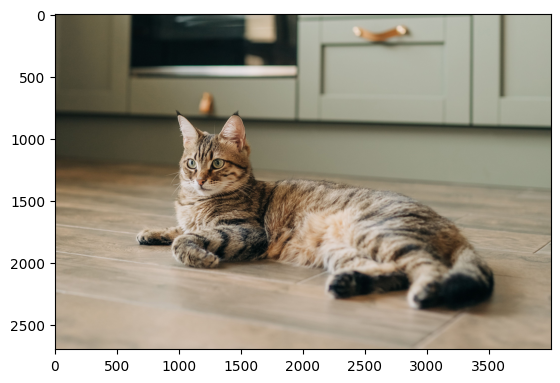

In [29]:
t_img = np.array(img)
t_img = t_img.transpose(1, 2, 0)
plt.imshow(t_img)

In [30]:
weights = DeepLabV3_ResNet50_Weights.DEFAULT

model = deeplabv3_resnet50(weights = weights)

model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [46]:
preprocess = weights.transforms(resize_size=320)

In [47]:
batch = preprocess(img)
batch = batch.unsqueeze(0)

In [48]:
with torch.no_grad():
  pred = model(batch)["out"]

mask = pred.argmax(dim=1)
mask = mask[0]

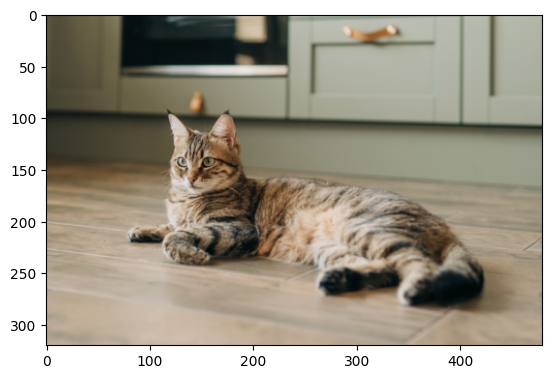

In [49]:
plt.imshow(img.permute(1, 2, 0))

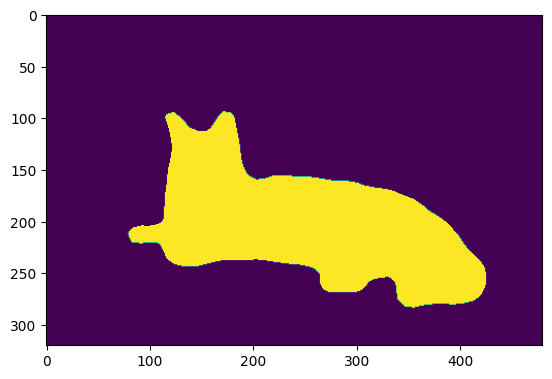

In [50]:
plt.imshow(mask)

In [52]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

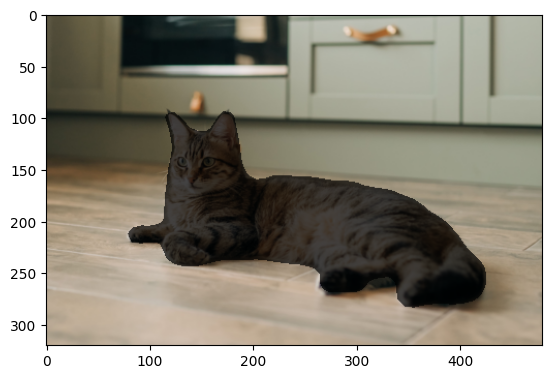

In [54]:
from torchvision.utils import draw_segmentation_masks

cat_mask = mask == class_to_idx['cat']

masked_img = draw_segmentation_masks(img, cat_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

# Завдання 2

Проведіть виявлення об'єктів на даному зображенні https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg

* Підберіть різні параметри `conf` та `iou` щоб подивитись на результат роботи моделі
* За допомогою параметра `classes` визначіть на зображенні лише:
  1. стільці
  2. бокали для вина
  3. рослини та вази

In [55]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [61]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.predict(source="/content/sample_data/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg",
                        conf=0.25, classes = [56, 40, 75, 58])[0]


image 1/1 /content/sample_data/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg: 448x640 2 wine glasss, 3 chairs, 3 potted plants, 1 vase, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


In [59]:
names = model.names
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [62]:
img_with_detection = results.plot(filename='result.png',
                                 save=True)

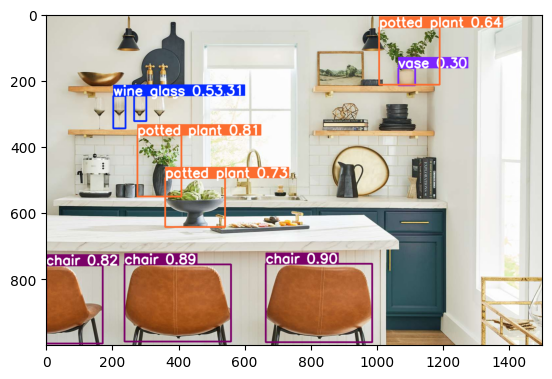

In [63]:
plt.imshow(img_with_detection[:, :, ::-1])
